In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special
from scipy.stats import poisson

### Problem 1

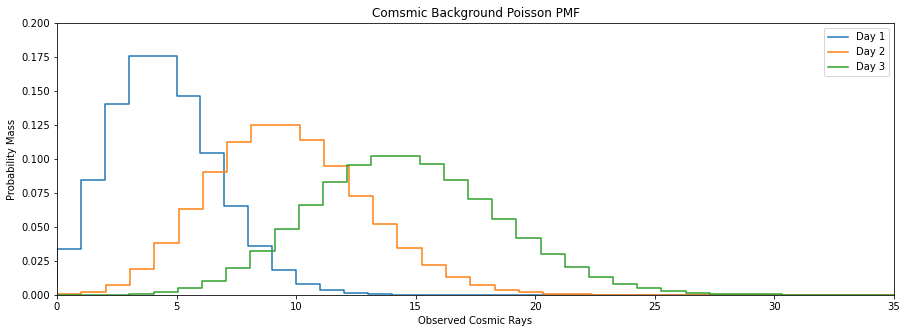

In [23]:
# Part 1A
x0 = np.linspace(0, 30, 31)
dist = stats.poisson.pmf(x0, 5) # mu = 5

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, dist)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, dist)
x3 = np.linspace(0, len(conv3), len(conv3))

conv4 = np.convolve(conv3, dist)
x4 = np.linspace(0, len(conv4), len(conv4))

fig, ax = plt.subplots(1, 1, figsize = (15, 5))

ax.step(x0, dist, label = 'Day 1')
ax.step(x1, conv1, label = 'Day 2')
ax.step(x2, conv2, label = 'Day 3')

ax.set_xlim(0, 35)
ax.set_ylim(0, 0.2)

plt.title("Comsmic Background Poisson PMF")
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Probability Mass')
ax.legend(loc='best')

plt.show()

1A: As we integrate more days, the cosmic background noise becomes wider as the days summed increases. The mean of the observed cosmic rays increases as the number of days summed increases, as the probability mass decreases, as seen in the figure. 

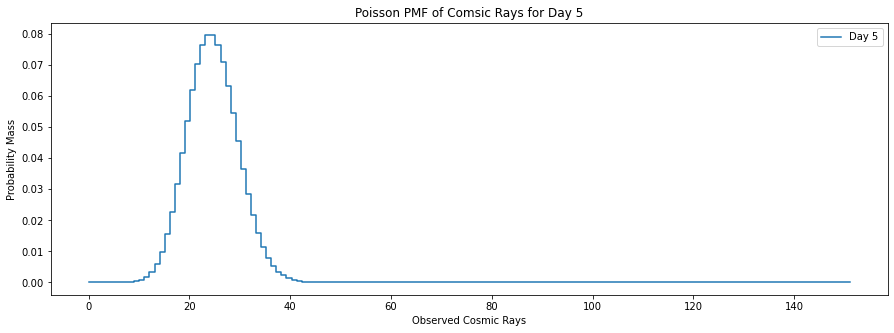

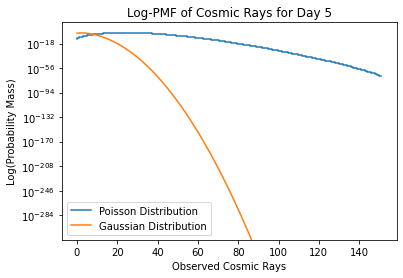

In [24]:
# Part 1B
conv3 = np.convolve(conv2, dist)
conv4 = np.convolve(conv3, dist)
x4 = np.linspace(0, len(conv4), len(conv4))

x = np.linspace(0, 30, 31)
norm = stats.norm.pdf(x)
conv5 = np.convolve(norm, norm)
conv6 = np.convolve(conv5, norm)
conv7 = np.convolve(conv6, norm)
conv8 = np.convolve(conv7, norm)
x8 = np.linspace(0, len(conv8), num=len(conv8))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x4, conv4, label='Day 5')
plt.title('Poisson PMF of Comsic Rays for Day 5')
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

plt.step(x4, conv4, label='Poisson Distribution')
plt.plot(x8, conv8, label='Gaussian Distribution')
plt.title('Log-PMF of Cosmic Rays for Day 5')
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Log(Probability Mass)')
plt.legend(loc='best')
plt.semilogy()
plt.show()

1B: After summing 5 days, it is apparant that it is still a Poisson distribution. From the semilog graph, it is apparant that the distribution is not Gaussian, and is still Poisson. It makes sense that the distribution is still Poisson because a Poisson distribution expresses the probability that a given number of independent events occur within an interval of time. So if you keep summing more and more intervals of time (in this case days), there is no reason for the distribution to change from Poisson.

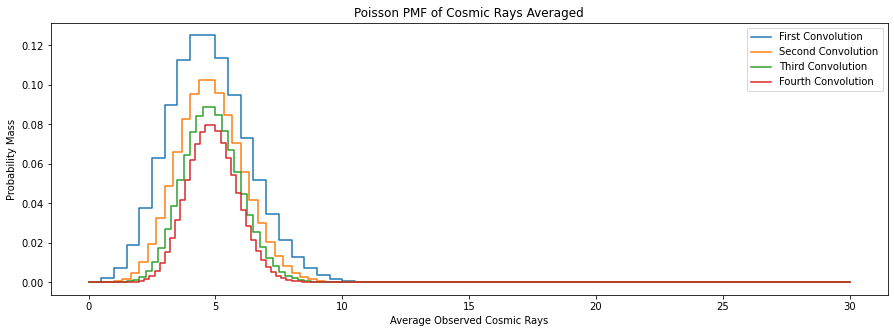

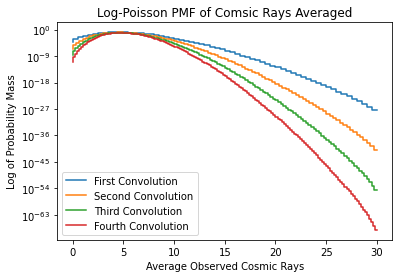

In [25]:
# Part 1C
x1 = np.linspace(0, 30, len(conv1))
x2 = np.linspace(0, 30, len(conv2))
x3 = np.linspace(0, 30, len(conv3))
x4 = np.linspace(0, 30, len(conv4))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x1, conv1, label = 'First Convolution')
plt.step(x2, conv2, label = 'Second Convolution')
plt.step(x3, conv3, label = 'Third Convolution')
plt.step(x4, conv4, label = 'Fourth Convolution')
plt.title('Poisson PMF of Cosmic Rays Averaged')
plt.xlabel("Average Observed Cosmic Rays")
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

# semilog graph
plt.step(x1, conv1, label = 'First Convolution')
plt.step(x2, conv2, label = 'Second Convolution')
plt.step(x3, conv3, label = 'Third Convolution')
plt.step(x4, conv4, label = 'Fourth Convolution')
plt.title('Log-Poisson PMF of Comsic Rays Averaged')
plt.xlabel("Average Observed Cosmic Rays")
plt.ylabel('Log of Probability Mass')
plt.legend(loc='best')
plt.semilogy()
plt.show()

1C: As we average the days (increase number of convolve functions), the probability distribution retains its shape but becomes skinnier, while still centered around the same mean. In relation to part B, since the summed probability distribution is still Poisson, the distribution when we average days should also remain Poisson. Looking at the semilog graph, it is apparant that as the number of days increases, the shape of the distribution becomes more and more like an upside down parabola, which is in line with what the Central Limit Theorem states. 

In [26]:
# Part 1D
conv4 = np.convolve(conv3, dist)
events = (6 * 8) # chose N = 6, Y = 8
cdf = 0
for i in range(int(events + 1)):
    cdf += conv4[i]
print(np.abs(stats.norm.ppf(1-cdf)))

4.186609247809223


1D: Choosing N = 6 days and Y = 8  average gamma rays emitted, gives the total number of events as 6 * 8 = 48 events observed. Then we must integrate from 0 to 48 to calculate the probability that the background noise gave a signal less than the detected value. We must then subtract this probability from 1 to get the probability that the background noise gave a signal larger than what was expected. Sigma = 4.19 

### Problem 2

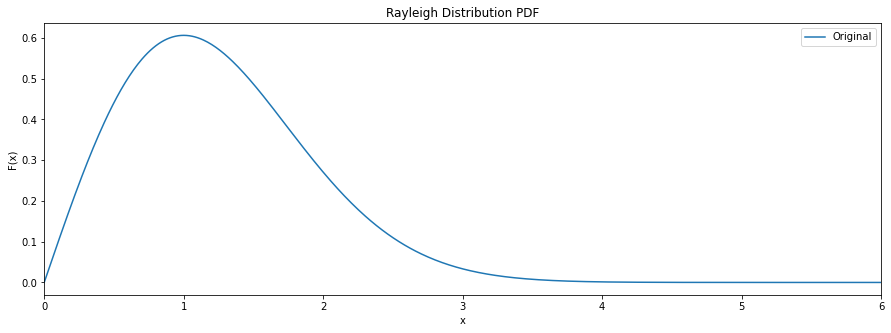

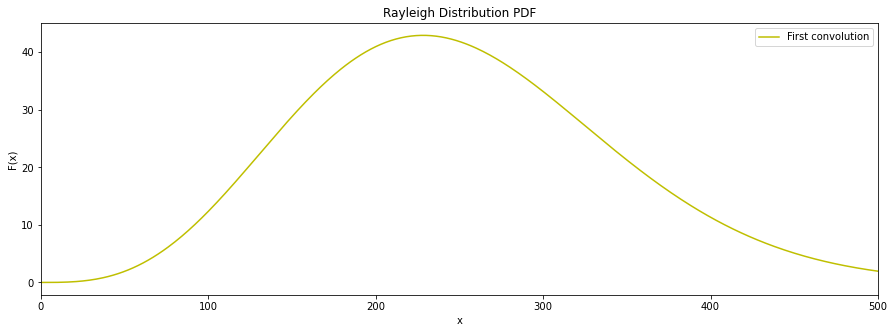

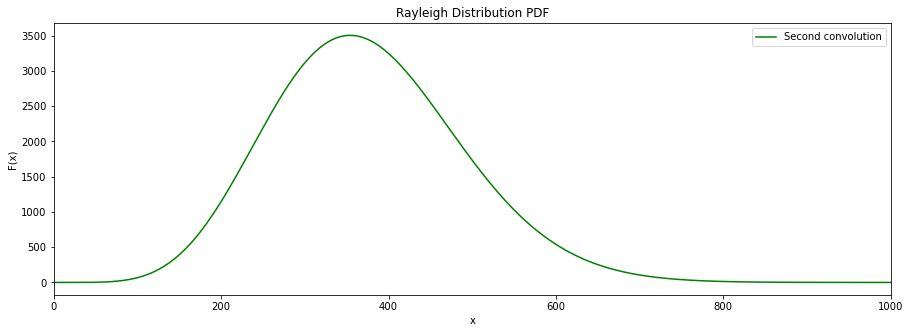

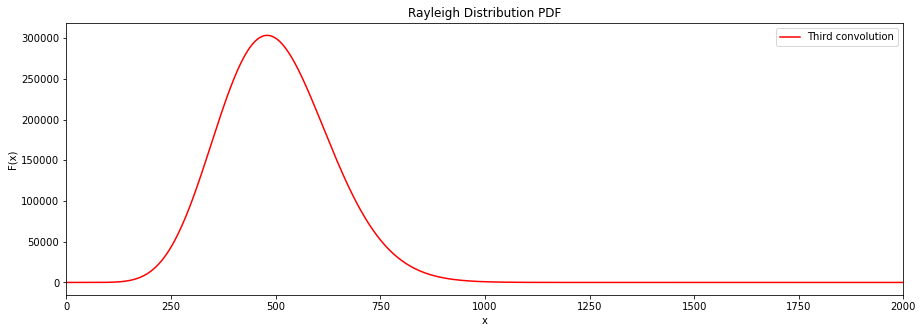

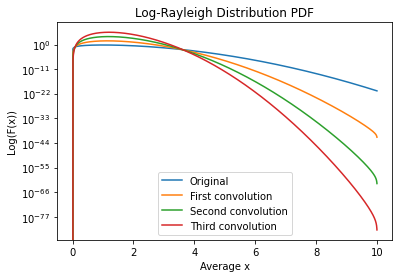

In [28]:
np.linspace(0, 10, len(conv1))
dist = stats.rayleigh.pdf(x)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, dist)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, dist)
x3 = np.linspace(0, len(conv3), len(conv3))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x, dist, label='Original')
plt.xlim(0, 6)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x1, conv1, label='First convolution', color='y')
plt.xlim(0, 500)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x2, conv2, label='Second convolution', color='g')
plt.xlim(0, 1000)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x3, conv3, label='Third convolution', color='r')
plt.xlim(0, 2000)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(loc='best')
plt.show()

x1n = np.linspace(0, 10, len(conv1))
x2n = np.linspace(0, 10, len(conv2))
x3n = np.linspace(0, 10, len(conv3))

plt.title("Log-Rayleigh Distribution PDF")
plt.plot(x, dist, label='Original')
plt.plot(x1n, conv1, label='First convolution')
plt.plot(x2n, conv2, label='Second convolution')
plt.plot(x3n, conv3, label='Third convolution')
plt.yscale('log')
plt.xlabel('Average x')
plt.ylabel('Log(F(x))')
plt.legend(loc='best')
plt.show()


2A: As we average over more intervals, the distributions gets closer and closer to a Gaussian distribution, judging from the shape of the graph. When plotted on a semilog axis, the shape of the graph becomes more and more like an upside down parabola as the number of convolutions increases.

2B: As the number of intervals increases, the Rayleigh distribution shifts to the rights and becomes skinnier and starts to look more like a Gaussian distribution. After around 1000 intervals, the distribution starts to look very similar to a Gaussian.

### Problem 3

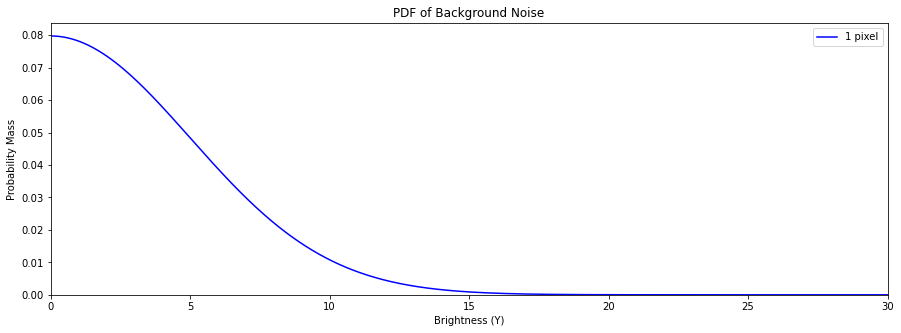

Sigma = 5.68


In [15]:
# Part 3A
dist = stats.norm(scale=5)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
x = np.linspace(0, 30, 1000)
plt.title("PDF of Background Noise")
plt.xlabel("Brightness (Y)")
plt.ylabel("Probability Mass")
plt.plot(x, dist.pdf(x), label='1 pixel', color='b')
plt.xlim(0, 30)
plt.ylim(0, None);
plt.legend(loc='best')
plt.show()

width = 5 # Width of Gaussian distribution X = 5
brightness = 28.4 # Signal of strength Y = 28.4
prob = 1 - stats.norm.cdf(brightness, loc=0, scale=width)
sigma = stats.norm.isf(prob)
print(f"Sigma = {sigma:.3}")

3A: With this detection, we can claim significant discovery because we have a sigma value of 5.68, which is greater than 5. 

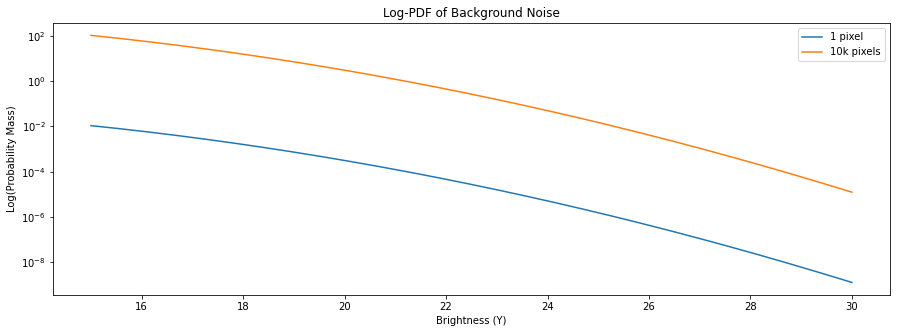

In [89]:
# Part 3B
pdf = stats.norm.pdf(x, loc=0, scale=5) # Standard deviation = 5, from previous part
scaled_pdf = pdf * 10000

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
x = np.linspace(15, 30, 1000)
plt.title("Log-PDF of Background Noise")
plt.xlabel("Brightness (Y)")
plt.ylabel("Log(Probability Mass)")
plt.plot(x, pdf, label = '1 pixel')
plt.plot(x, scaled_pdf, label = '10k pixels')
plt.legend(loc = 'best')
plt.semilogy()
plt.show()

3B: Since we do not know which specific location to look in, we must combine the background distributions of 10k pixels. Following the lecture slides, I multiplied the probability density by 10k to get scaledPdf, which is the probability distribution of the background.

In [83]:
# Part 3C
scaled_prob = prob * 10000
scaled_ppf = np.abs(stats.norm.ppf(scaled_prob))
print(f"Probability = {scaled_prob:.3}")
print(f"Sigma = {scaled_ppf:.3}")


Probability = 6.73e-05
Sigma = 3.82


3C: Assuming that the brightest candidate signal has a strength of 28.4 (from previous part), the new sigma value is 3.82 

### Problem 4

In [14]:
# Part 4A
value = 5
prob = 1 - stats.norm.cdf(value)
signal = np.abs(dist.ppf(prob))
print(f"Probability = {prob:.3}")
print(f"Signal = {signal:.3}")

Probability = 2.87e-07
Signal = 25.0


4A: The minimum signal strength needed for a sigma of 5 is 25.0. 

In [12]:
# Part 4B
value = 5
prob = (1 - stats.norm.cdf(value)) / 10000
signal = np.abs(dist.isf(prob))
print(f"Probability = {prob:.3}")
print(f"Signal = {signal:.3}")

Probability = 2.87e-11
Signal = 32.8


4B: The minimum signal strength needed for a sigma of 5 for a trials factor of 10k is 32.8

4C: The signal strength must increase from 25.0 to 32.8 

In [25]:
# Part 4D
# Increasing number of trials from 10k to 100 million

fivesig = 1-stats.norm.cdf(5)
signal = stats.norm.ppf(1-fivesig/100000000, scale=5)
print(f"Signal strength required for 5 sigma : {signal:.3f}")
bright = signal/6.5
print(f"Brightness factor compared to 6.5 : {bright:.3f}")


Signal strength required for 5 sigma : 39.044
Brightness factor compared to 6.5 : 6.007


As we increase the number of trials from 10k to 100 million, we need a signal strength of 39.044 for the data point to be within 5 sigma. Even though we increased the number of trials by a factor of ten thousand, the signal strength for 5 sigma only increased from 32.8 to 39.044. This is because the probability diminishes very quickly as a signal strength increases. Looking at the tail end of the Gaussian distribution, if a signal was just a slightly bit stronger, the probability of it occuring becomes exponentially smaller, which is why it becomes even less likely that the signal was detected from background cosmic radiation.

### Extra Credit

In [27]:
fivesig = 1-stats.norm.cdf(5)
base_signal = stats.expon.ppf(1-fivesig, scale = 5)
print(f"Signal strength required for 5 sigma : {signal:.3f}\nwith trials factor of 1\n")

signal = stats.expon.ppf(1-fivesig/10000, scale = 5)
print(f"Signal strength required for 5 sigma : {signal:.3f}\nwith trials factor of 10k")
factor = signal/base_signal
print(f"Signal factor : {factor:.3f}\n")

signal = stats.expon.ppf(1-fivesig/100000000, scale = 5)
print(f"Signal strength required for 5 sigma : {signal:.3f}\nwith trials factor of 100M")
factor = signal/base_signal
print(f"Signal factor : {factor:.3f}")

Signal strength required for 5 sigma : 167.394
with trials factor of 1

Signal strength required for 5 sigma : 121.377
with trials factor of 10k
Signal factor : 1.611

Signal strength required for 5 sigma : 167.394
with trials factor of 100M
Signal factor : 2.222


Here, I created an exponential distribution with the same scale factor of 5. From the results, it is clear that an exponential distribution is much more sensitive to the number of trials increasing. However, even with the exponential distribution, I expect for there to be a similar "probability decay" as the number of trials gets even larger. 